In [15]:
import re
import pandas as pd
from urlextract import URLExtract
import matplotlib.pyplot as plt
from collections import Counter

In [16]:
import pandas as pd
from urlextract import URLExtract
import matplotlib.pyplot as plt

In [17]:
file = open("WhatsApp Chat with Itachi.txt", "r", encoding="utf-8")
data = file.read()
# print(data)

In [18]:
pattern_re = r"\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?(?:AM|PM|am|pm)?\s-\s"
messages = re.split(pattern_re, data)[1:]

In [19]:
dates = re.findall(pattern_re, data)
# print(dates)

In [20]:
df = pd.DataFrame({'messages':messages, 'dates': dates})
df['dates'] = df['dates'].str.replace("\u202f", " ", regex=True)  
df['dates'] = df['dates'].str.replace(" - $", "", regex=True)
df['dates'] = pd.to_datetime(df['dates'], format='%m/%d/%y, %I:%M %p')

# df.head()

In [21]:
users = []
user_msgs = []
for msg in df['messages']:
    entry = re.split(r'([\w\W]+?):\s', msg)
    if entry[1:]:
        users.append(entry[1])
        user_msgs.append(entry[2])
    else:
        users.append("chat/group notification")
        user_msgs.append(entry[0])

df['users'] = users
df['user_messages'] = user_msgs

df.drop(columns=['messages'], inplace=True)
# df.head()

In [22]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month_name()
df['day'] = df['dates'].dt.day
df['hour'] = df['dates'].dt.hour
df['minute'] = df['dates'].dt.minute

# df.head()

In [23]:
words=[]
for messages in df['user_messages']:
    words.extend(messages.split())
# len(words)

In [24]:
media = 0
for messages in df['user_messages']:
    if messages.split("\n")[0] == '<Media omitted>':
        media += 1
# print(media)  #complex o(n)

# print(df[df['user_messages'] == '<Media omitted>\n'].shape[0])  #very efficient

In [25]:
links = []
extractor = URLExtract()
for messages in df['user_messages']:
    links.extend(extractor.find_urls(messages))


<BarContainer object of 3 artists>

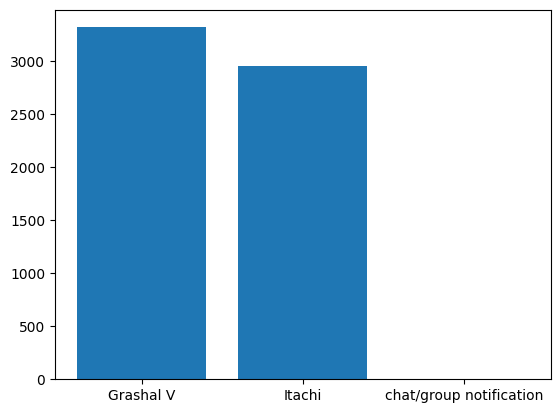

In [26]:
user_msgs_count = df['users'].value_counts().head(7)
# plt.bar(user_msgs_count.index, user_msgs_count.values)
# plt.show()
# print(user_msgs_count.values)

In [27]:
# round((df['users'].value_counts()/df.shape[0]*100),2).reset_index().rename(columns={'index':'users', 'count':'percent'})

In [28]:
words_df = df[(df['users'] != 'chat/group notification') & (df['user_messages'] != '<Media omitted>\n')]
file = open("hinglish_stopwords.txt", "r", encoding="utf-8")
stop_words = file.read()

words = []
for messages in words_df['user_messages']:
    for word in messages.lower().split():
        if word not in stop_words:
            words.append(word)   

# df_words = pd.DataFrame(Counter(words).most_common(20), columns=['words', 'frequency'])